# Prueba de McNemar
## 1. Análisis de evolución de productos
+ Supongamos que estamos evaluando la efectividad de una campaña publicitaria, donde 100 personas indicaron si preferían un producto antes y después de ver un anuncio.
+ |                              | Prefiere antes | No prefiere antes | Total  |
+ |------------------------------|----------------|--------------------|-------|
+ | Prefiere producto después    |           30   |             20     |   50  |
+ | No prefiere producto después |           10   |             40     |   50  |
+ | **Total**                    |         40     |             60     |   100 |

Se utilizan dos cremas diferentes para tratar el pie de atleta. A cada sujeto con esta infección micótica en ambos pies se le trata un pie con Pedacream y el otro con Fungacream. Los resul tados muestrales se presentan en la tabla correspondiente. Utilice un nivel de significancia de 0.05 y aplique la prueba de McNemar para poner a prueba la hipótesis nula de que las siguientes proporciones son iguales:
●    La proporción de sujetos cuyo pie tratado con Pedacream no se cura y cuyo pie tratado con Fungacream sí se cura.
●    La proporción de sujetos cuyo pie tratado con Pedacream sí se cura y cuyo pie tratado con Fungacream no se cura.

Con base en los resultados, ¿parece que hay una diferencia entre los dos tratamientos? ¿Un tratamiento es mejor que otro?

Requisito:  Los datos son pares de conteos de frecuencias, a partir de sujetos elegidos al azar, y cada observación se puede categorizar de acuerdo con dos variables. (Una variable tiene los valores de “Pedacream” y “Fungacream”, y la otra variable tiene los valores de “curado” y “no curado”). Además, las frecuencias deben ser tales que b+c >= 10. Para la tabla, b=8 y c=   40, de manera que b+c=48, que es mayor 10. Por lo tanto, todos los requisitos se satisfacen. Aunque la tabla podría parecer una tabla de contingencia 2x2, no podemos usar los procedimientos chi-cuadrado ni Fisher, porque se trata de datos apareados (en vez de ser independientes). En su lugar, empleamos la prueba de McNemar.

Hipótesis
Hipótesis nula (H₀): No hay diferencia entre los tratamientos. Las proporciones de sujetos cuyos pies se curan con Pedacream y no con Fungacream son iguales a las proporciones de sujetos cuyos pies se curan con Fungacream y no con Pedacream.
Hipótesis alternativa (H₁): Hay una diferencia significativa entre los tratamientos, es decir, las proporciones no son iguales.
Después de comparar los conteos de frecuencia, observamos que el estadístico de prueba se calcula de la siguiente manera:
+ χ² = {(|b-c|)-1)²} / (b+c)
+ χ² = {(|8-40|)-1)²} / (8+40)
+ χ² = 20.021

Con un nivel de significancia de 0.05 y grados de libertad dados por gl = 1, vamos a encontrar el valor crítico de x2 = 3.841 para esta prueba de cola derecha. El estadístico de prueba χ² = 20.021 excede al valor crítico x2 = 3.841 , de manera que rechazamos la hipótesis nula. Parece que las dos cremas producen resultados diferentes. Al analizar las frecuencias de 8 y 40, vemos que Pedacream cura muchos más pies que Fungacream, de manera que el tratamiento con Pedacream parece ser más efectivo.

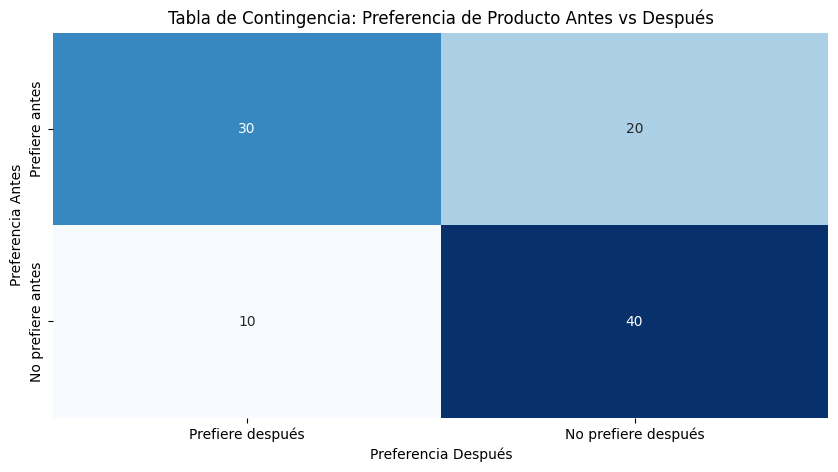

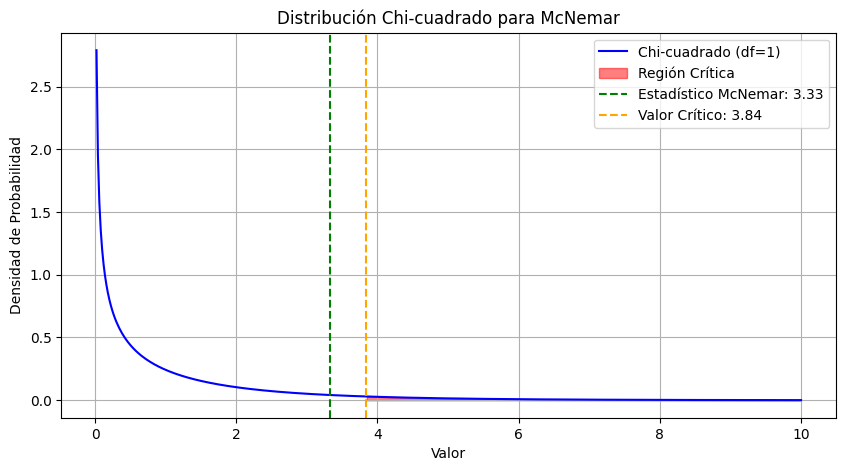

(3.3333333333333335, 3.841458820694124, 0.067889154861829)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2

# Datos del ejemplo
# Prefiere producto después (Sí / No) en función de la preferencia antes
data = np.array([[30, 20], [10, 40]])
df_contingency = pd.DataFrame(data, columns=["Prefiere después", "No prefiere después"], index=["Prefiere antes", "No prefiere antes"])

# Extraer valores de la tabla
b = df_contingency.loc["Prefiere antes", "No prefiere después"]
c = df_contingency.loc["No prefiere antes", "Prefiere después"]

# Calcular el estadístico de McNemar
mcnemar_stat = (b - c)**2 / (b + c)

# Grados de libertad (siempre 1 para McNemar)
df = 1

# Valor crítico y valor p
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, df)
p_value = 1 - chi2.cdf(mcnemar_stat, df)

# Gráfico de la tabla de contingencia
plt.figure(figsize=(10, 5))
sns.heatmap(df_contingency, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Tabla de Contingencia: Preferencia de Producto Antes vs Después')
plt.xlabel('Preferencia Después')
plt.ylabel('Preferencia Antes')
plt.show()

# Gráfico de la distribución Chi-cuadrado
x = np.linspace(0, 10, 500)
y = chi2.pdf(x, df)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label=f'Chi-cuadrado (df={df})', color='blue')
plt.fill_between(x, y, where=(x > critical_value), color='red', alpha=0.5, label='Región Crítica')
plt.axvline(x=mcnemar_stat, color='green', linestyle='--', label=f'Estadístico McNemar: {mcnemar_stat:.2f}')
plt.axvline(x=critical_value, color='orange', linestyle='--', label=f'Valor Crítico: {critical_value:.2f}')
plt.title('Distribución Chi-cuadrado para McNemar')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid()
plt.show()

# Resultados
mcnemar_stat, critical_value, p_value


Observe que en el cálculo del estadístico de prueba del ejemplo anterior, no incluimos a los 12 sujetos que se curaron de ambos pies (cada pie tratado con una de las cremas) y tampoco incluimos a los 20 sujetos que no se curaron de ningún pie. En vez de incluir los resultados de curado/curado y los resultados de no curado/no curado, sólo usamos los resultados de curado/no curado y no curado/curado. Es decir, sólo incluimos los resultados de las categorías que son diferentes. A este tipo de categorías diferentes se les denomina pares discordantes.

Los pares discordantes de resultados provienen de pares de categorías en las que ambas categorías son diferentes (como en curado/no curado o no curado/ curado).

Al tratar de determinar si existe una diferencia significativa entre los dos tratamientos con las cremas en la tabla, no nos resultan útiles los sujetos que se curaron de ambos pies, ni tampoco los sujetos que no se curaron de ningún pie. Las diferencias se reflejan en los resultados discordantes de los sujetos que se curaron de un pie y no del otro. Como consecuencia, el estadístico de prueba sólo incluye las dos frecuencias que resultan de los dos pares discordantes (o diferentes) de categorías.

_____________________________________________________________________________________________________________________________________